<h2 align=center> Named Entity Recognition (NER) using LSTMs with Keras</h2>

### Task 1: Project Overview and Import Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.3.0
GPU detected: []


### Task 2: Load and Explore the NER Dataset

*Essential info about tagged entities*:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [2]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')
data = data.fillna(method='ffill')
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [3]:
print("Unique words in corpus: ", data['Word'].nunique())
print("Unique tags in corpus: ", data['Tag'].nunique())

Unique words in corpus:  35178
Unique tags in corpus:  17


<AxesSubplot:xlabel='Tag', ylabel='count'>

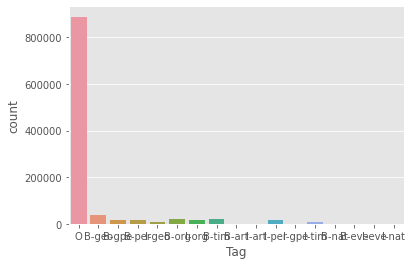

In [4]:
import seaborn as sns
import tkinter
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='Tag', data=data)

In [5]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [6]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [7]:
num_words, num_tags

(35179, 17)

### Task 3: Retrieve Sentences and Corresponsing Tags

In [8]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                          s["POS"].values.tolist(),
                                                          s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [9]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [10]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

### Task 4: Define Mappings between Sentences and Tags

In [11]:
# enumerate() -> add a counter to an iterable and returns it
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [12]:
tag2idx

{'I-tim': 0,
 'B-geo': 1,
 'B-art': 2,
 'I-per': 3,
 'I-nat': 4,
 'B-org': 5,
 'I-org': 6,
 'I-art': 7,
 'B-nat': 8,
 'I-gpe': 9,
 'O': 10,
 'B-per': 11,
 'B-tim': 12,
 'B-eve': 13,
 'I-eve': 14,
 'B-gpe': 15,
 'I-geo': 16}

### Task 5: Padding Input Sentences and Creating Train/Test Splits

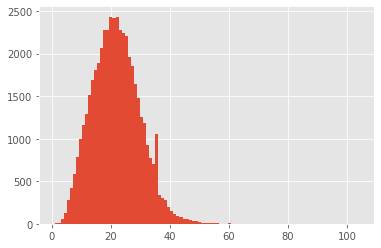

In [13]:
plt.hist([len(s) for s in sentences], bins=100)
plt.show()

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding='post', value=tag2idx["O"])
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [15]:
X[0]

array([ 2510,  7049, 17406, 16007, 13230, 30253,  9798, 20715, 17446,
        6588, 26384, 15862, 34464, 28033,  5469,  6588, 20763,  7049,
       31947,  2742,  1032, 20374, 23170, 21365, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178], dtype=int32)

In [16]:
sent = 'Thousand of animal'
aaa = []
for w in sent.split():
    print(w)
    try:
        aaa.append(word2idx[w])
    except:
        aaa.append(num_words-1)
        
nnn = len(aaa)
for _ in range(nnn, 50):
    aaa.append(num_words-1)
aaa = np.array(aaa, dtype=int)
len(aaa)

Thousand
of
animal


50

In [17]:
word2idx['and']

28033

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Task 6: Build and Compile a Bidirectional LSTM Model

In [19]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [20]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
# SpatialDropout1D -> rather than dropping dropping individual nodes, it drops the entire 1D feature map
model = SpatialDropout1D(0.1)(model)
# Rather than RNN, we are using LSTM to avoid Vanishing Gradient Problem
# using Bi-directional LSTM because, our model can learn from the entire input, rather than just the previous timestamps
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Task 7: Train the Model

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras
import keras
from keras.models import load_model

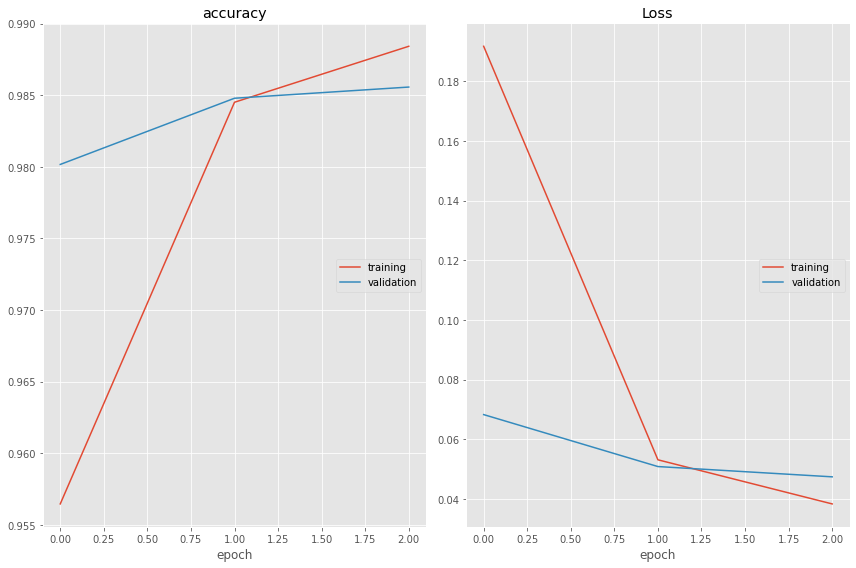

accuracy
	training         	 (min:    0.956, max:    0.988, cur:    0.988)
	validation       	 (min:    0.980, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.038, max:    0.192, cur:    0.038)
	validation       	 (min:    0.047, max:    0.068, cur:    0.047)

Epoch 00003: val_loss improved from 0.05089 to 0.04745, saving model to model_ner.h5
1080/1080 [==============================] - 104s 96ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0474 - val_accuracy: 0.9856


In [23]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)

filename = 'model_ner.h5'
checkpoint = ModelCheckpoint(filename,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

callbacks = [PlotLossesKeras(), early_stopping, checkpoint]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size=32,
    epochs=3,
    verbose=1,
    callbacks=callbacks
)

### Task 8: Evaluate Named Entity Recognition Model

In [24]:
model_ner = load_model("model_ner.h5")

In [25]:
model.evaluate(x_test, np.array(y_test))

150/150 [==============================] - 2s 10ms/step - loss: 0.0490 - accuracy: 0.9854


[0.049041494727134705, 0.9854211807250977]

In [135]:
i = np.random.randint(0, x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true = np.argmax(np.array(y_test), axis=-1)[i]
print("{:15}{:5}\t {}\n".format("word", "True", "Pred"))
print("-"*30)

idx = 0
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))
    idx += 1
    if idx == 15:
        break

word           True 	 Pred

------------------------------
The            O	O
Vatican        B-org	B-org
has            O	O
announced      O	O
that           O	O
U.S.           B-org	B-geo
President      B-per	B-per
George         I-per	I-per
Bush           I-per	I-per
will           O	O
meet           O	O
with           O	O
Pope           O	O
Benedict       B-per	I-per
in             O	O


In [123]:
def text_process(text):
    seq = []
    for w in text.split():
        try:
            seq.append(word2idx[w])
        except:
            seq.append(num_words-1)

    sz = len(seq)
    for _ in range(sz, 50):
        seq.append(num_words-1)
    seq = np.array(seq, dtype=int)
    return seq, sz

In [132]:
def get_ner(text):
    seq, sz = text_process(text)
    p = model_ner.predict(np.array([seq]))
    p = np.argmax(p, axis=-1)

    idx = 0
    for w, pred in zip(seq, p[0]):
        if tags[pred] != 'O':
            print("{:15}\t{}".format(words[w-1], tags[pred]))
        idx += 1
        if idx == sz:
            break

In [133]:
get_ner('Sunday is close day for London .')

Sunday         	B-tim
London         	B-geo


In [134]:
get_ner('I will go to London from Indonesia Sunday Morning .')

London         	B-geo
Indonesia      	B-geo
Sunday         	B-tim
Morning        	I-tim


In [137]:
get_ner('U.S. President George Bush will visit the Vatican city Tomorrow Morning .')

U.S.           	B-org
President      	B-per
George         	I-per
Bush           	I-per
Vatican        	B-org
Tomorrow       	B-geo
Morning        	I-org
